In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from pycocotools.coco import COCO
from matplotlib import rcParams

In [26]:
annotation= '../../dataset/train.json'
coco=COCO(annotation)
len(coco.getImgIds())
rcParams['figure.figsize'] = 50,30
classes = ["General trash", "Paper", "Paper pack", "Metal", "Glass", 
           "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [27]:
x_coor=[]
y_coor=[]
for i in coco.getImgIds():
    for j in coco.getAnnIds(i):
        box=coco.anns[j]['bbox']
        x_coor.append(round(box[0]+box[2]/2))
        y_coor.append(round(box[1]+box[3]/2))

In [28]:
# sns.kdeplot(x=x_coor,y=y_coor,fill=True,levels=20,cbar="crest")

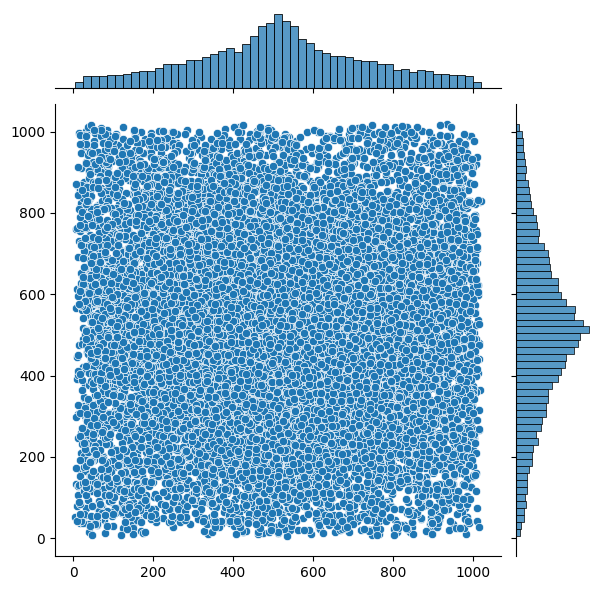

In [29]:
sns.jointplot(x=x_coor,y=y_coor,kind='scatter',cmap="crest")

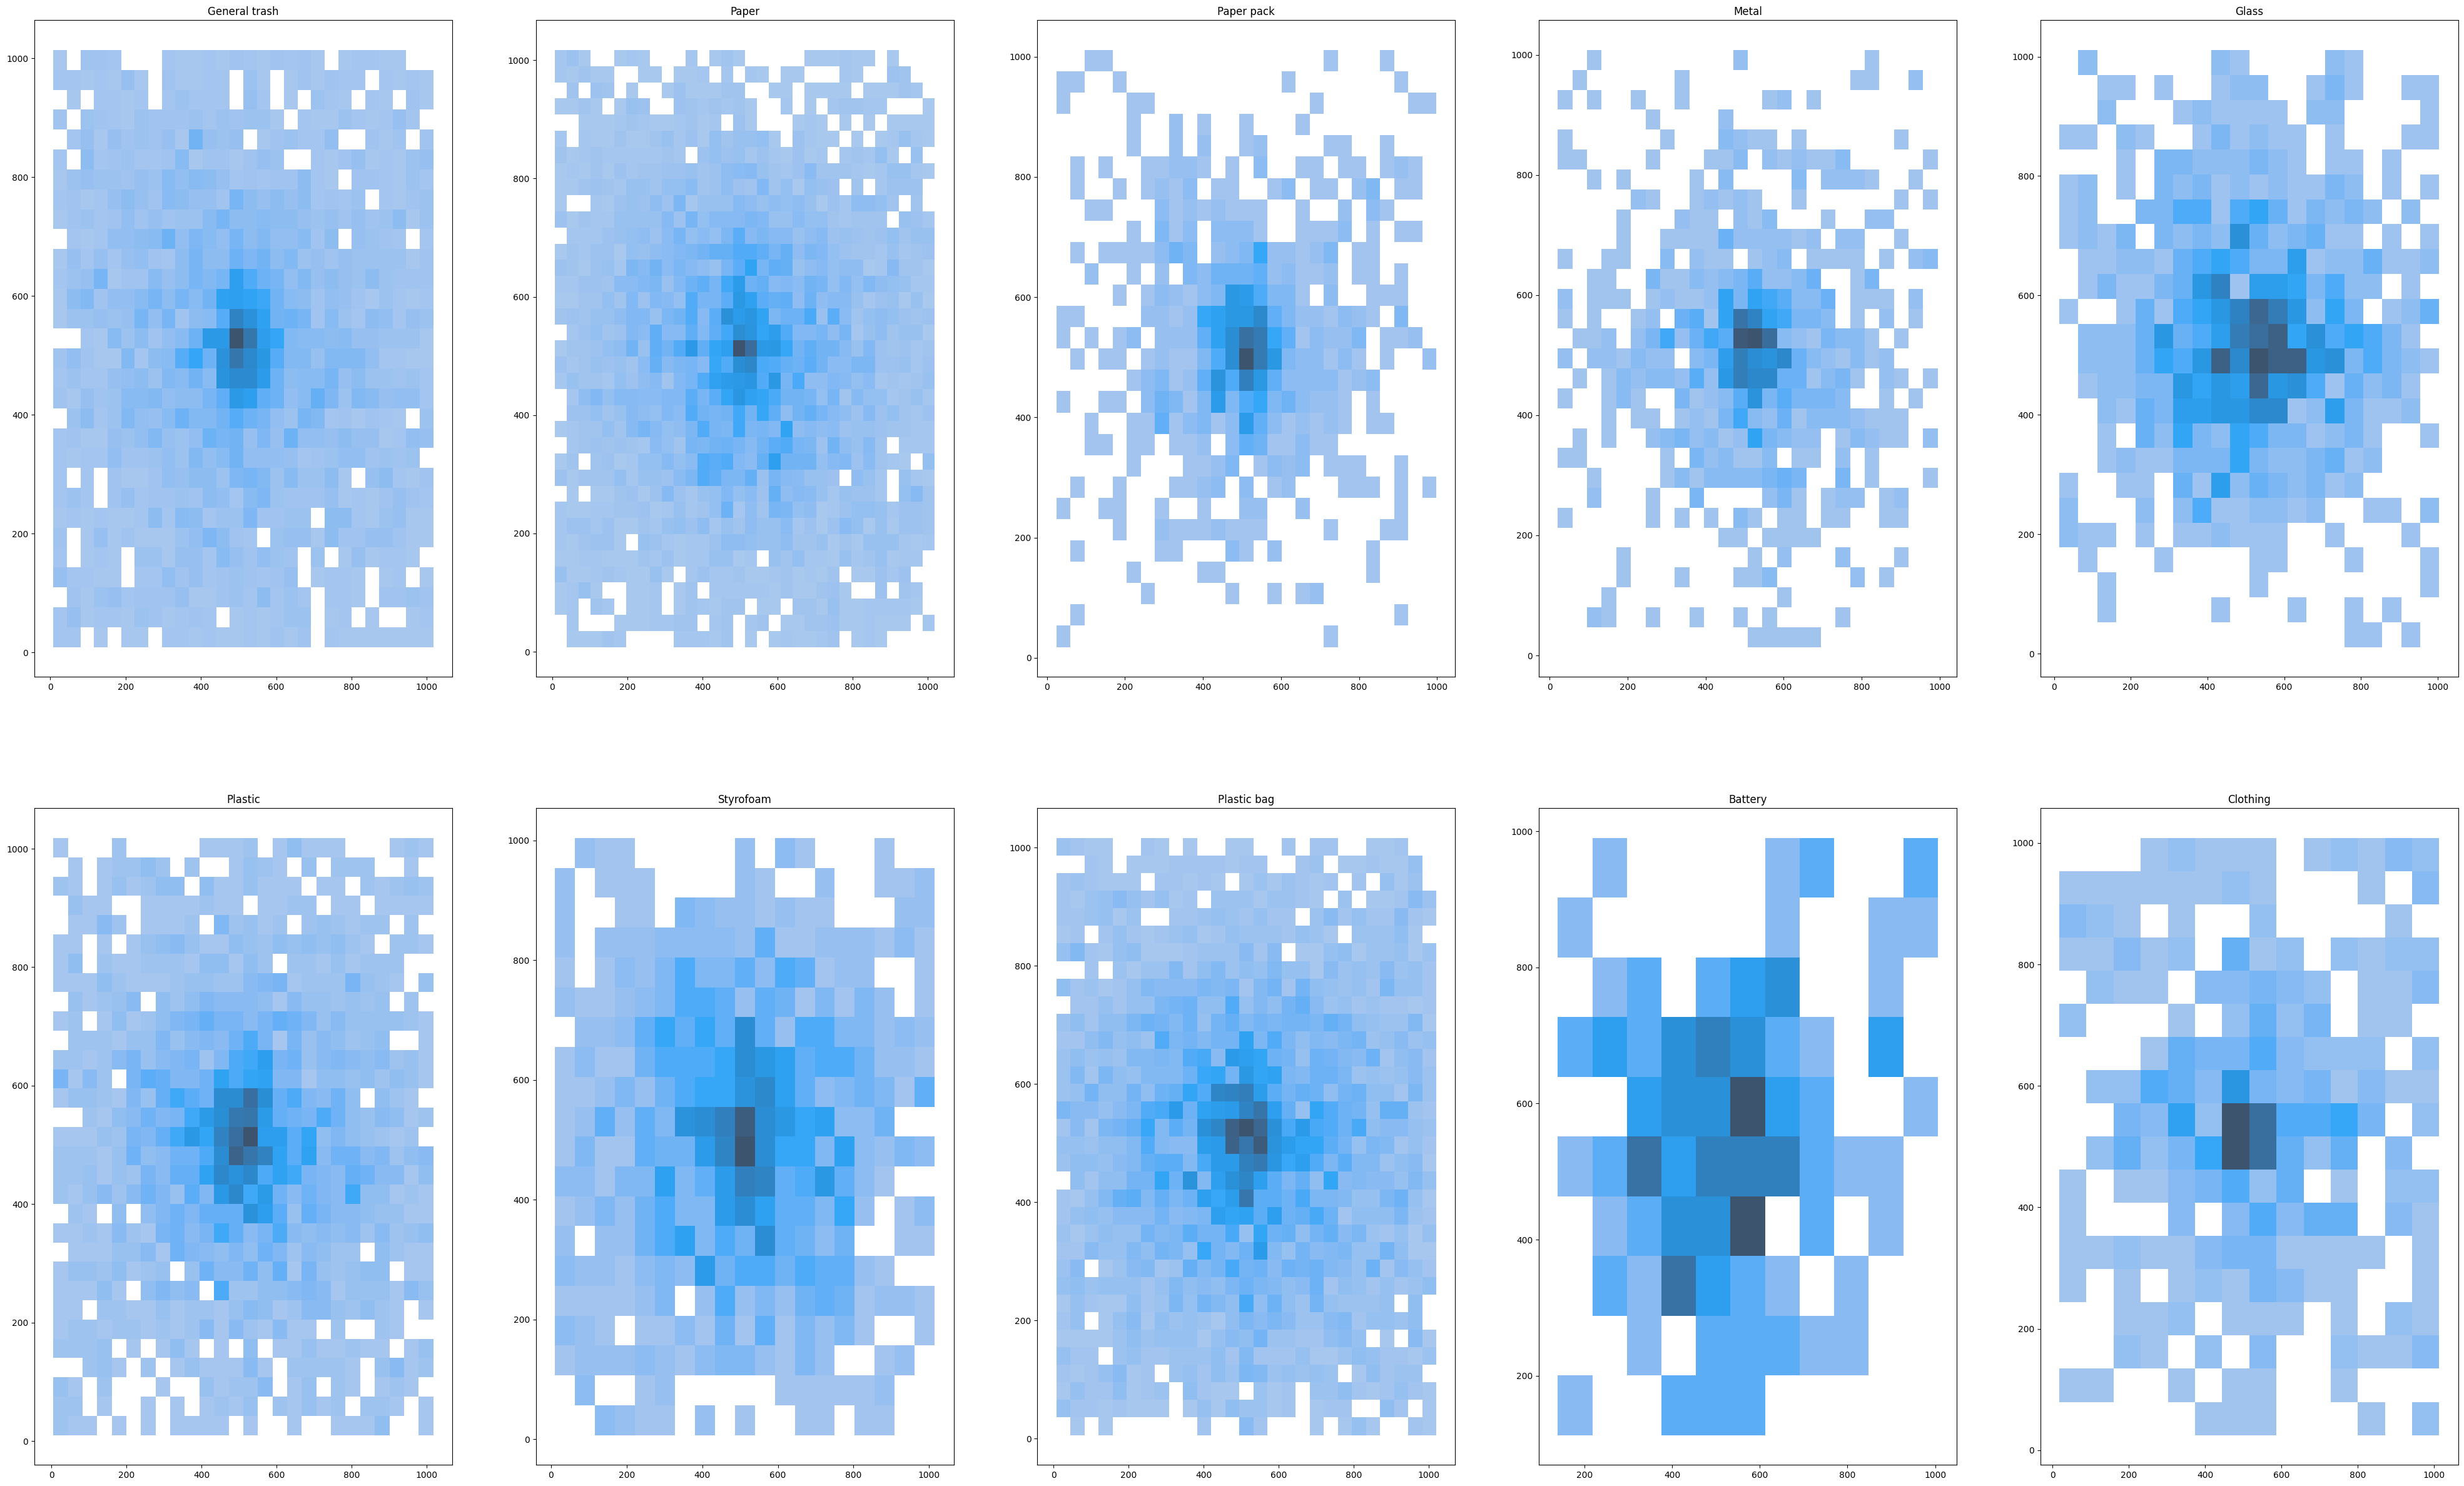

In [30]:
fig, axs=plt.subplots(ncols=5,nrows=2)

for c in range(10):
    x_coor=[]
    y_coor=[]
    for i in coco.getImgIds():
        for j in coco.getAnnIds(i):
            if coco.anns[j]['category_id']==c:
                box=coco.anns[j]['bbox']
                x_coor.append(round(box[0]+box[2]/2))
                y_coor.append(round(box[1]+box[3]/2))
    sns.histplot(x=x_coor,y=y_coor,ax=axs[c//5][c%5]).set_title(classes[c])
                